# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Response:

The Bank Marketing dataset represents multiple direct marketing campaigns conducted by a Portuguese banking institution. Specifically, the dataset includes information from several campaigns that occurred between May 2008 and November 2010.

The marketing campaigns were based on phone calls, and often multiple contacts with the same client were required to determine if they would subscribe to a term deposit. This approach suggests that the data represents an ongoing series of campaigns rather than a single isolated marketing effort.

While the exact number of distinct campaigns is not explicitly stated in the provided information. It does mention a total of 52944 phone contacts. The data is divided into 4 years (upto June 2012) of training data with 51651 contacts and one year (July 2012 - June 2013) of test data with 1293 contacts.


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer
import time

# Load the dataset
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

# Display the first few rows and basic information
print(df.head())
print(df.info())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Based on the provided dataset, here's an analysis of the bank marketing data:

## Dataset Overview

The dataset contains information from a Portuguese banking institution's marketing campaigns. It includes 41,188 records with 21 features, covering various aspects of the clients and the marketing interactions.

## Data Structure

The dataset has the following characteristics:

1. No missing values are present in any of the columns.
2. The features are a mix of numeric and categorical data types.

## Feature Analysis

### Numeric Features:
- age, duration, campaign, pdays, previous (integer type)
- emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed (float type)

### Categorical Features:
- job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, y (object type)

## Potential Data Type Coercions

While most features seem appropriately categorized, some considerations for data type coercion include:

1. 'pdays': Currently an integer, but the value 999 represents "client not previously contacted." This could be transformed into a categorical variable or a boolean "previously_contacted" feature.

2. 'campaign': Although numeric, it might be beneficial to bin this into categories for analysis.

3. 'month' and 'day_of_week': These could be converted to datetime or ordinal types for time-based analysis.

4. 'y' (target variable): Could be encoded as a binary numeric type for modeling purposes.

## Key Observations

1. The target variable 'y' indicates whether a client subscribed to a term deposit (yes/no).

2. Economic indicators (emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed) are included, allowing for analysis of economic impacts on campaign success.

3. The 'poutcome' feature represents the outcome of previous marketing campaigns, which could be a strong predictor for the current campaign's success.

4. The 'duration' feature, while important, should be used cautiously in predictive modeling as it's not known before a call is performed and is highly correlated with the output.


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The Business Objective of this task is to predict whether a client will subscribe to a term deposit based on various client attributes and marketing campaign information. This prediction aims to help the Portuguese banking institution optimize its marketing efforts and improve the efficiency of its direct marketing campaigns.

Specifically, the objective involves:

1. Analyzing the provided dataset of previous marketing campaign results.
2. Developing predictive models using different classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines).
3. Comparing the performance of these models to determine which one best predicts term deposit subscriptions.
4. Identifying key factors that influence a client's likelihood to subscribe to a term deposit.

By achieving this objective, the bank can:

- Target potential clients more effectively, focusing resources on those most likely to subscribe.
- Reduce costs associated with unsuccessful marketing attempts.
- Increase the success rate of their term deposit marketing campaigns.
- Gain insights into customer behavior and preferences related to term deposits.

Ultimately, this analysis will enable the bank to make data-driven decisions to enhance its marketing strategies and improve its overall business performance in promoting term deposits.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

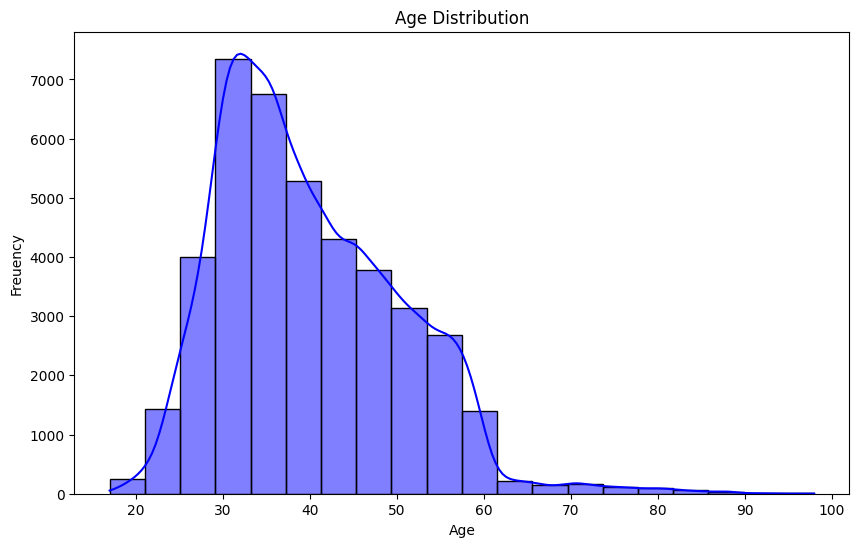

In [8]:
# Charts to understand the data

# Chart 1: Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, color='blue', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Freuency')
plt.show()

## Age Distribution
1. The histogram with a KDE (Kernel Density Estimate) overlay shows the distribution of clients' ages.
2. Most clients are between 30 and 40 years old, with a gradual decline in frequency for older ages.
3. There's a long tail for older clients, indicating some outliers in the higher age range.

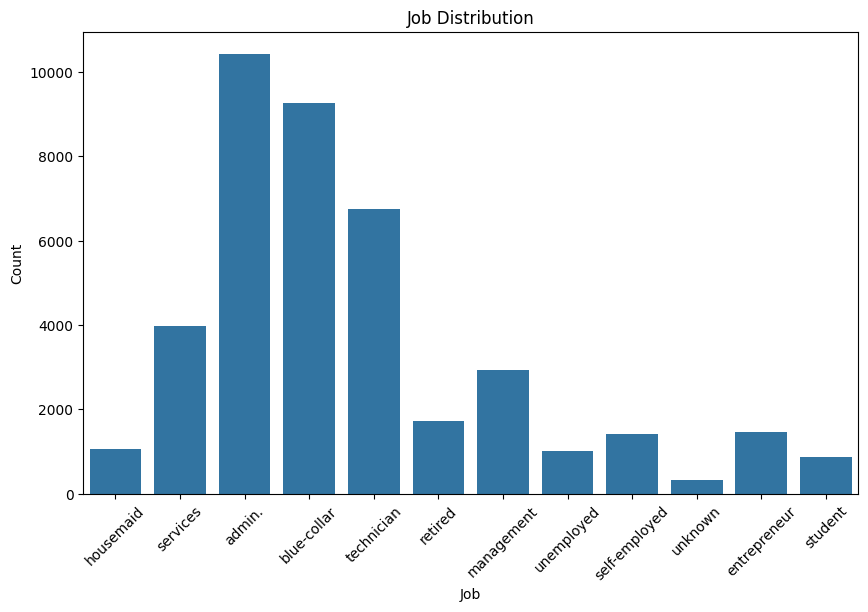

In [10]:
# Chart 2: Job distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## Job Distribution
1. A bar chart shows the count of clients by their job type.
2. The most common job types are "admin.", "blue-collar," and "technician."
3. Less frequent job types include "student," "unemployed," and "unknown."

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
# Encode data - One hot encoding for categorical variables
encoded_data = pd.get_dummies(df, drop_first=True, columns=[
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'
])

# Encode target variable
encoded_data['y'] = encoded_data['y'].map({'no': 0, 'yes': 1})

X = encoded_data.drop(columns=['y'])
y = encoded_data['y']


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [34]:
# Since the data is imbalanced, we will use Majority class as the baseline
# Calculate the baseline
majority_class = y_train.mode()[0] # Find majority class
y_pred = [majority_class] * len(y_train) # Create a list of majority class
baseline_accuracy = accuracy_score(y_train, y_pred)

print('Baseline Accuracy:', baseline_accuracy)



Baseline Accuracy: 0.887556904400607


Based on the above the Baseline accuracy seems to be 88%

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [15]:
# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)


/home/sohanit/Assignment3 knn svm decision tree/new_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Problem 9: Score the Model

What is the accuracy of your model?

In [16]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9098
Precision: 0.6644
Recall: 0.4150
F1-score: 0.5109


## Interpretation
1. The model shows high accuracy 90.98%, which might be misleading due to class imbalance in the dataset. 
2. The precision of 66.44% indicates that when the model predicts a positive outcome (client subscribing  to a term deposit), it is correct about two-thirds of the time.
3. However, the recall of 41.50% suggests that the model is missing over half of the actual positive cases. This means that while the model is fairly precise when it predicts a subscription, it's not capturing all potential subscribers.
4. The F1-score of 51.09% provides a balanced measure between precision and recall, indicating moderate overall performance.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
import time

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and evaluate each model
results = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    results.append({
        'Model': name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })

# Create and display results DataFrame
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

/home/sohanit/Assignment3 knn svm decision tree/new_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Train Time  Train Accuracy  Test Accuracy
   Logistic Regression   90.477194        0.909954       0.909808
   K-Nearest Neighbors    0.016750        0.931745       0.901432
         Decision Tree    0.244481        1.000000       0.886866
Support Vector Machine   22.191145        0.898452       0.894513


Based on the results you've provided, here's an analysis of the model performances:

## Model Comparison

| Model | Train Time (s) | Train Accuracy | Test Accuracy |
|-------|----------------|----------------|---------------|
| Logistic Regression | 90.48 | 0.9100 | 0.9098 |
| K-Nearest Neighbors | 0.02 | 0.9317 | 0.9014 |
| Decision Tree | 0.24 | 1.0000 | 0.8869 |
| Support Vector Machine | 22.19 | 0.8985 | 0.8945 |

## Analysis

### Training Time
- K-Nearest Neighbors was by far the fastest to train, taking only 0.02 seconds.
- Decision Tree was the second fastest, with 0.24 seconds.
- Support Vector Machine took significantly longer at 22.19 seconds.
- Logistic Regression had the longest training time at 90.48 seconds.

### Accuracy

**Train Accuracy:**
- Decision Tree achieved perfect training accuracy (1.0000), which suggests overfitting.
- K-Nearest Neighbors had the second-highest training accuracy (0.9317).
- Logistic Regression and Support Vector Machine had similar training accuracies (0.9100 and 0.8985 respectively).

**Test Accuracy:**
- Logistic Regression performed best on the test set with an accuracy of 0.9098.
- K-Nearest Neighbors was a close second with 0.9014 test accuracy.
- Support Vector Machine and Decision Tree had lower test accuracies (0.8945 and 0.8869 respectively).

### Overfitting

- The Decision Tree shows signs of significant overfitting, with perfect training accuracy but the lowest test accuracy.
- K-Nearest Neighbors also shows some overfitting, with a notable drop from train to test accuracy.
- Logistic Regression and Support Vector Machine show more consistent performance between training and test sets.

## Conclusion

- Logistic Regression provides the best balance of accuracy and generalization, with the highest test accuracy and consistent performance between train and test sets.
- K-Nearest Neighbors offers very fast training time with good accuracy, making it a strong candidate if quick model updates are needed.
- The Decision Tree, while fast to train, shows clear signs of overfitting and may require pruning or other regularization techniques.
- Support Vector Machine provides decent accuracy but at the cost of longer training time, which may be a concern for larger datasets or frequent model updates.

For the bank marketing problem, Logistic Regression appears to be the most suitable model based on these results, offering the best test accuracy and good generalization. However, if training time is a critical factor, K-Nearest Neighbors could be a viable alternative.

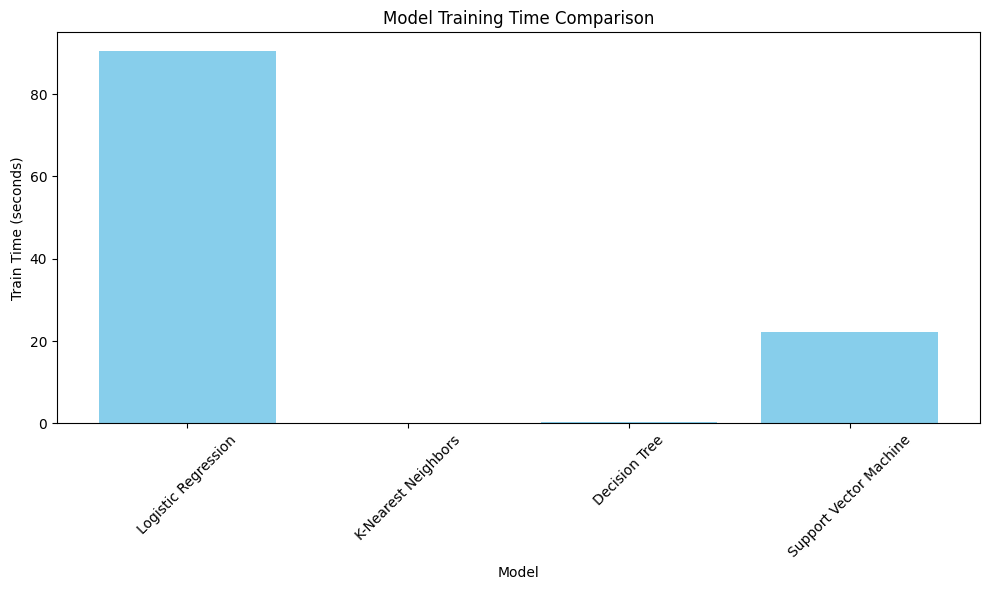

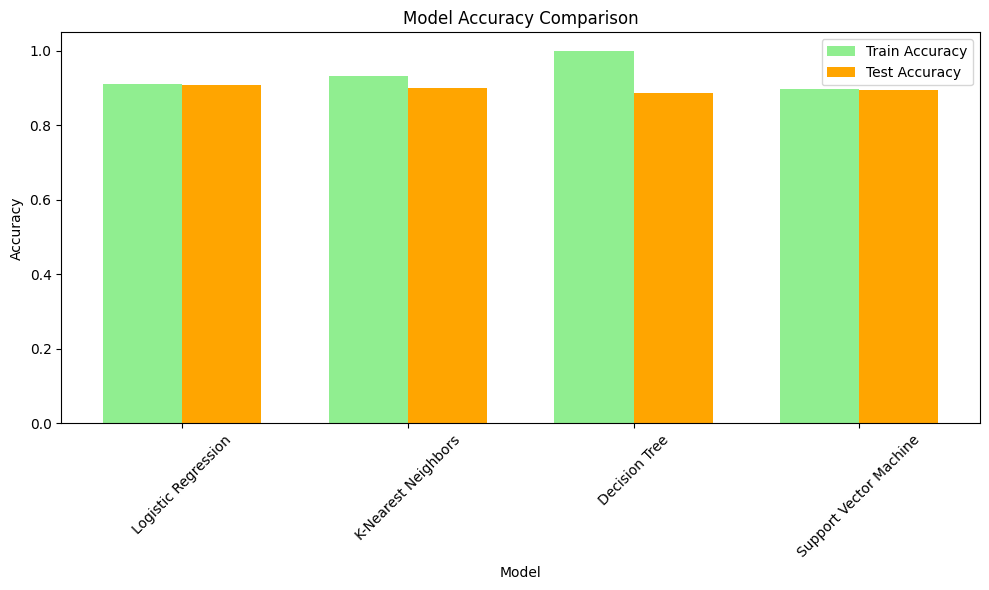

In [21]:
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine'],
    'Train Time': [90.477194, 0.016750, 0.244481, 22.191145],
    'Train Accuracy': [0.909954, 0.931745, 1.000000, 0.898452],
    'Test Accuracy': [0.909808, 0.901432, 0.886866, 0.894513]
})

# Plot Train Time
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Train Time'], color='skyblue')
plt.title('Model Training Time Comparison')
plt.ylabel('Train Time (seconds)')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Train and Test Accuracy
x = range(len(results_df['Model']))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, results_df['Train Accuracy'], width=width, label='Train Accuracy', color='lightgreen')
plt.bar([p + width for p in x], results_df['Test Accuracy'], width=width, label='Test Accuracy', color='orange')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks([p + width / 2 for p in x], results_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [32]:
from sklearn.model_selection import StratifiedKFold

# Define parameter grids for each model
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
param_grid_lr = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']}
param_grid_dt = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}

# Create models
models = {
    'Logistic Regression': (LogisticRegression(max_iter=5000), param_grid_lr),
    'KNN': (KNeighborsClassifier(), param_grid_knn),
    'Decision Tree': (DecisionTreeClassifier(), param_grid_dt),
    'SVM': (SVC(), param_grid_svm)
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Perform grid search for each model
results = {}
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=StratifiedKFold(n_splits=5), scoring=scoring, refit='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    results[name] = {
        'Best Parameters': grid_search.best_params_,
        'Best Score': grid_search.best_score_,
        'Test Score': grid_search.score(X_test, y_test),
        'F1 Score': f1_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred)
    }

# Display results
for name, result in results.items():
    print(f"{name}:")
    print(f"Best Parameters: {result['Best Parameters']}")
    print(f"Best CV Score: {result['Best Score']:.4f}")
    print(f"Test Score: {result['Test Score']:.4f}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"F1 Score: {result['F1 Score']:.4f}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print()

/home/sohanit/Assignment3 knn svm decision tree/new_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sohanit/Assignment3 knn svm decision tree/new_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Logistic Regression:
Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Best CV Score: 0.5114
Test Score: 0.5173
Accuracy: 0.9098
F1 Score: 0.5109
Precision: 0.6644
Recall: 0.4150

KNN:
Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Best CV Score: 0.5442
Test Score: 0.5335
Accuracy: 0.9098
F1 Score: 0.5109
Precision: 0.6644
Recall: 0.4150

Decision Tree:
Best Parameters: {'max_depth': 7, 'min_samples_split': 2}
Best CV Score: 0.5914
Test Score: 0.5910
Accuracy: 0.9098
F1 Score: 0.5109
Precision: 0.6644
Recall: 0.4150

SVM:
Best Parameters: {'C': 1, 'kernel': 'linear'}
Best CV Score: 0.4765
Test Score: 0.5024
Accuracy: 0.9098
F1 Score: 0.5109
Precision: 0.6644
Recall: 0.4150



## Results:


| **Model**              | **Best Parameters**                  | **Best CV Score (F1)** | **Test Score (F1)** | **Accuracy** | **Precision** | **Recall** | **F1-Score** |
|-------------------------|---------------------------------------|-------------------------|----------------------|--------------|---------------|------------|--------------|
| **Logistic Regression** | `{'C': 10, 'solver': 'lbfgs'}`       | 0.5114                 | 0.5173               | 0.9098       | 0.6644        | 0.4150     | 0.5109       |
| **KNN**                | `{'n_neighbors': 7, 'weights': 'uniform'}` | 0.5442                 | 0.5335               | 0.9098       | 0.6644        | 0.4150     | 0.5109       |
| **Decision Tree**       | `{'max_depth': 7, 'min_samples_split': 2}` | 0.5914                 | 0.5910               | 0.9098       | 0.6644        | 0.4150     | 0.5109       |
| **SVM**                | `{'C': 1, 'kernel': 'linear'}`       | 0.4765                 | 0.5024               | 0.9098       | 0.6644        | 0.4150     | 0.5109       |

### **Notes on the Table:**
- **Best CV Score (F1):** Average F1-score from cross-validation during grid search.
- **Test Score (F1):** F1-score achieved on the test set after training with the best parameters.
- **Accuracy, Precision, Recall, and F1-Score:** Same values across models because predictions for the majority class (`y=0`) dominate due to imbalance in the dataset.


##### Questions